# HM4, Clustering and PCA

## Load Data Set

In [181]:
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split

# 1. load 
data = datasets.load_iris()
X,y= data.data, data.target


### k-Means

In [182]:
from sklearn import datasets, metrics, cluster, mixture

# parameterize clustering
kmeans_algo = cluster.KMeans(n_clusters=2,algorithm='lloyd',init='random',n_init=1)

# learn the model
kmeans_model = kmeans_algo.fit(X)

# return centroids
kmeans_model.cluster_centers_
labels = kmeans_model.labels_

In [183]:
print("means:\n",kmeans_model.cluster_centers_)

means:
 [[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


### Evaluation

In [184]:
# compute silhouette
print("Silhouette:",metrics.silhouette_score(X, labels, metric='euclidean'))

Silhouette: 0.6810461692117462


If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.



In [185]:
from sklearn.metrics import davies_bouldin_score
print("Davies Bouldin:",davies_bouldin_score(X, labels))

Davies Bouldin: 0.4042928371730435


## EM Clustering

In [186]:
from sklearn.mixture import GaussianMixture

# learn EM with multivariate Gaussian assumption
em_algo = GaussianMixture(n_components=2, covariance_type='full',n_init=1) 
em_model = em_algo.fit(X)

# describe EM solution
print("means:\n",em_model.means_,"\n\ncovariances:\n",em_model.covariances_)

means:
 [[5.00600639 3.4280142  1.46200203 0.24599932]
 [6.26198886 2.87199642 4.90597719 1.67599129]] 

covariances:
 [[[0.12176331 0.09722605 0.01602717 0.01012447]
  [0.09722605 0.14080279 0.01146185 0.00911288]
  [0.01602717 0.01146185 0.02955704 0.00594818]
  [0.01012447 0.00911288 0.00594818 0.0108851 ]]

 [[0.43497387 0.12094155 0.44886533 0.16550229]
  [0.12094155 0.10961836 0.14138002 0.07923243]
  [0.44886533 0.14138002 0.67484296 0.2858736 ]
  [0.16550229 0.07923243 0.2858736  0.17863587]]]


In [187]:
prob=em_model.predict_proba(X)
prob[5]

array([1.0000000e+00, 8.3399127e-13])

## Evaluation

In [188]:
labels_em= em_model.predict(X)
print("Silhouette:",metrics.silhouette_score(X, labels_em, metric='euclidean'))
print("Davies Bouldin:",davies_bouldin_score(X, labels_em))

Silhouette: 0.6867350732769777
Davies Bouldin: 0.382752842100686


## PCA

In [189]:
from sklearn.decomposition import PCA

# learn the transformation (components as linear combination of features)
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)
print("Components:\n",pca.components_)


Components:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


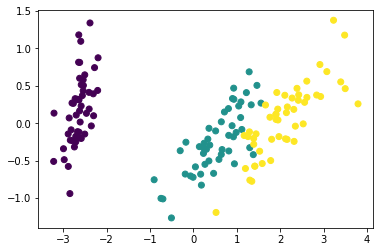

In [190]:
plt.scatter(X_pca[:,0], X_pca[:,1],c=y)
plt.show()

## k Means

In [191]:
X_pca = pca.transform(X)


# learn the model
kmeans_model = kmeans_algo.fit(X_pca)

# return centroids
kmeans_model.cluster_centers_
labels = kmeans_model.labels_


In [192]:
print("means:\n",kmeans_model.cluster_centers_)

means:
 [[-2.53737542  0.12775509]
 [ 1.38640101 -0.06980433]]


In [193]:
# compute silhouette
print("Silhouette:",metrics.silhouette_score(X_pca, labels, metric='euclidean'))

Silhouette: 0.7056703225102109


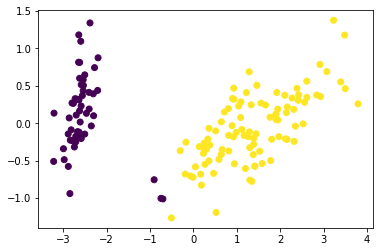

In [194]:

plt.scatter(X_pca[:,0], X_pca[:,1],c=labels)
plt.show()


## EM Clustering

Silhouette: 0.7112353733237211


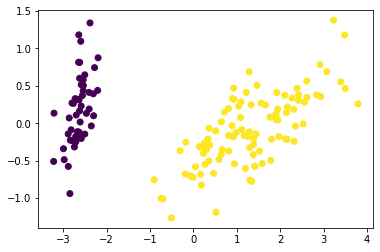

In [195]:
em_model = em_algo.fit(X_pca)
labels_em= em_model.predict(X_pca)
# compute silhouette
print("Silhouette:",metrics.silhouette_score(X_pca, labels_em, metric='euclidean'))

plt.scatter(X_pca[:,0], X_pca[:,1],c=labels_em)
plt.show()